In [2]:
import pandas as pd
d_test=pd.read_csv(r'C:\Users\rohit\Desktop\Excelr\Assignments\Logistic Regression\titanic-survival-app\Titanic_test.csv')
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
d_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
d_test.shape

(418, 11)

In [5]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
d_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
d_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
numeric_colt=d_test.select_dtypes(include=['int64','float64'])

<Axes: >

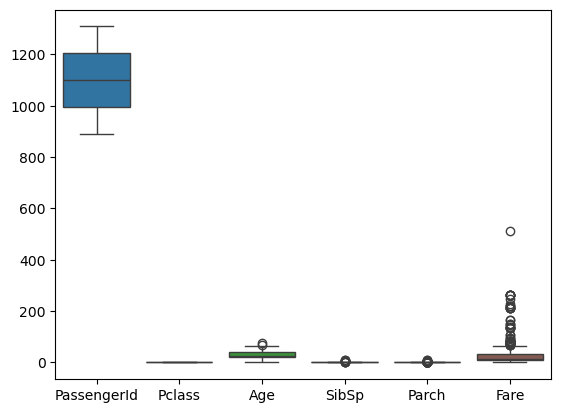

In [9]:
import seaborn as sns
sns.boxplot(data=d_test)

In [10]:
numeric_colt=d_test.select_dtypes(include=['int64','float64'])

In [11]:
for col in d_test.columns:
    if d_test[col].dtypes == 'object':
        # Fill categorical columns with mode
        mode_val = d_test[col].mode()[0]
        d_test[col] = d_test[col].fillna(mode_val)
    else:
        # Use median for skewed numeric columns
        if abs(d_test[col].skew()) > 1:
            d_test[col] = d_test[col].fillna(d_test[col].median())
        else:
            d_test[col] = d_test[col].fillna(d_test[col].mean())

d_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
d_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
zt=d_test.corr(numeric_only=True)
zt

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.030874,0.003818,0.043080,0.008633
Pclass,-0.026751,1.000000,-0.440782,0.001087,0.018721,-0.577313
Age,-0.030874,-0.440782,1.000000,-0.079535,-0.045073,0.324568
SibSp,0.003818,0.001087,-0.079535,1.000000,0.306895,0.171912
Parch,0.043080,0.018721,-0.045073,0.306895,1.000000,0.230325
Fare,0.008633,-0.577313,0.324568,0.171912,0.230325,1.000000


<Axes: >

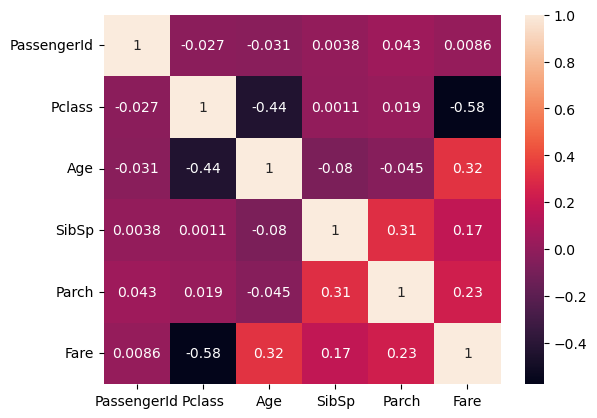

In [14]:
import seaborn as sns
sns.heatmap(zt,annot=True)

<Axes: >

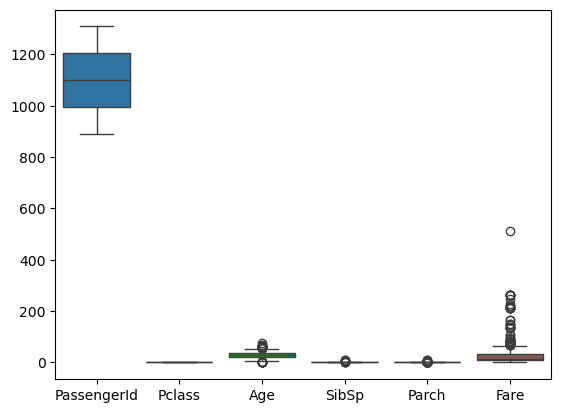

In [15]:
sns.boxplot(data=d_test)

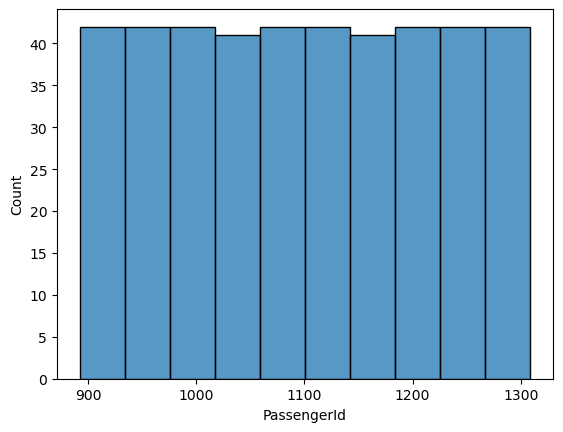

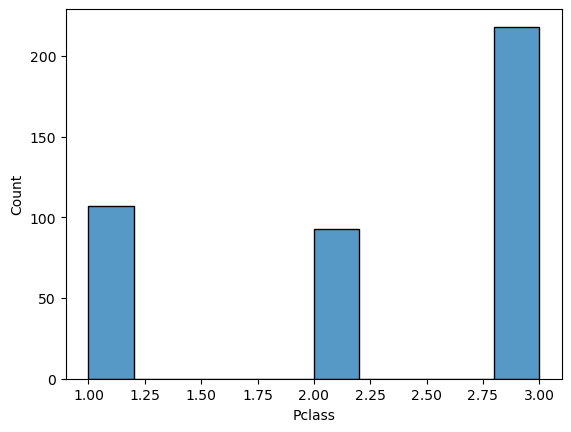

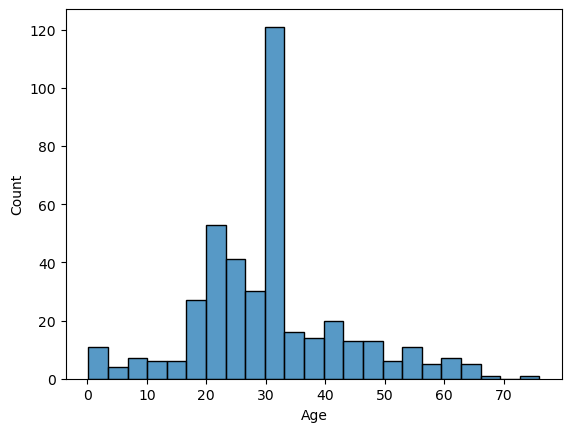

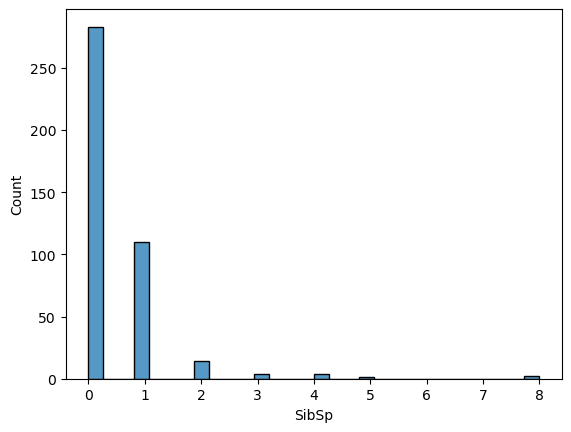

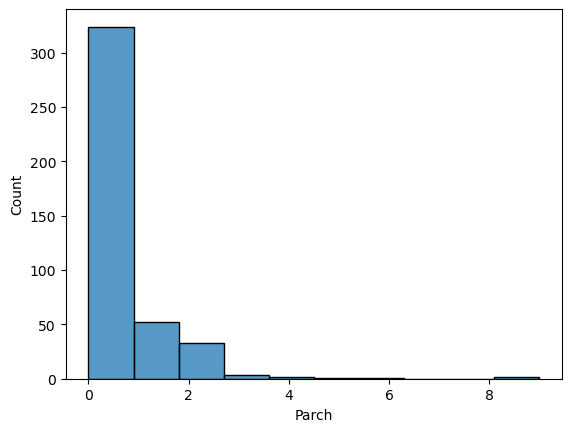

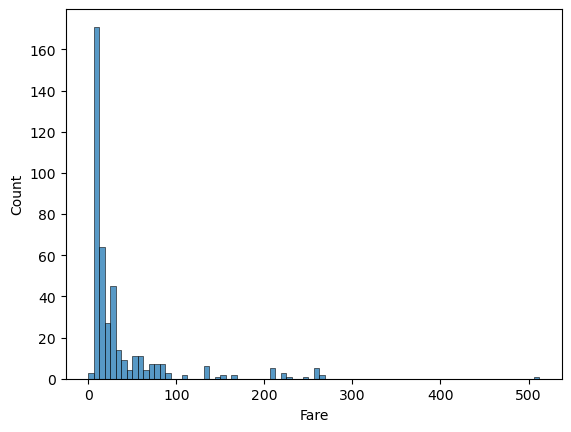

In [16]:
import matplotlib.pyplot as plt
for col in numeric_colt:
  sns.histplot(d_test[col],kde=False)
  plt.show()

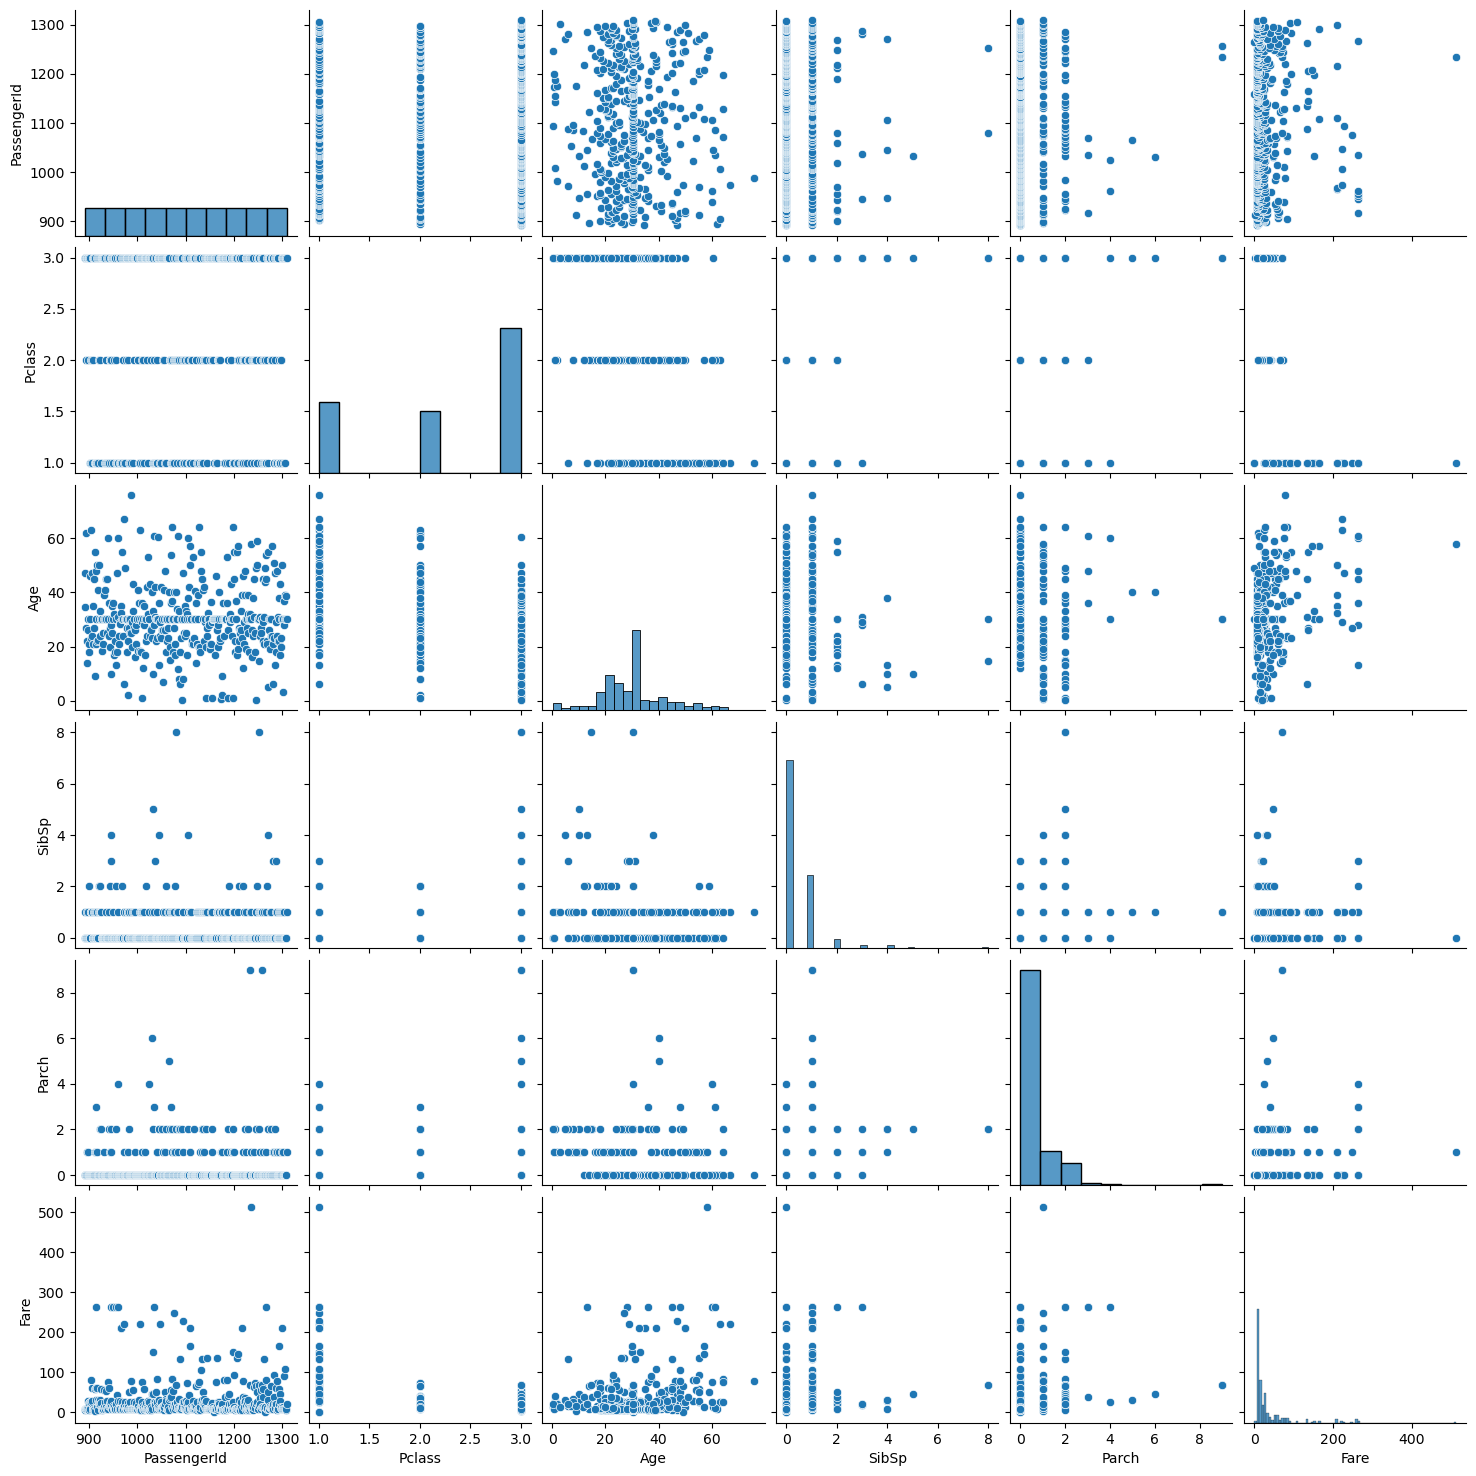

In [17]:
sns.pairplot(data=d_test)

In [18]:
#2 Train data set
d_train=pd.read_csv(r'C:\Users\rohit\Desktop\Excelr\Assignments\Logistic Regression\titanic-survival-app\Titanic_train.csv')
d_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
d_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
d_train.shape

(891, 12)

In [21]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
d_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
d_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: >

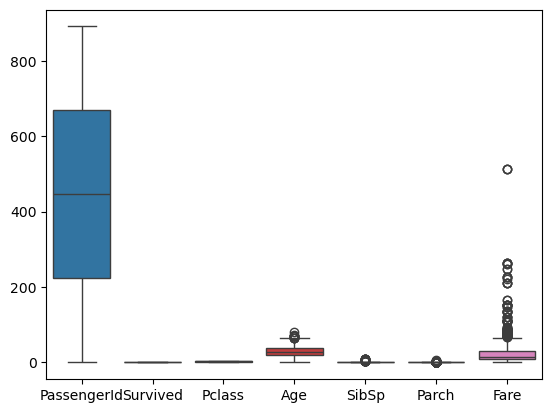

In [24]:
sns.boxplot(data=d_train)


In [25]:
numeric_col=d_train.select_dtypes(include=['int64','float64'])

In [26]:
for col in d_train.columns:
    if d_train[col].dtypes == 'object':
        # Fill categorical columns with mode
        mode_val = d_train[col].mode()[0]
        d_train[col] = d_train[col].fillna(mode_val)
    else:
        # Use median for skewed numeric columns
        if abs(d_train[col].skew()) > 1:
            d_train[col] = d_train[col].fillna(d_train[col].median())
        else:
            d_train[col] = d_train[col].fillna(d_train[col].mean())

d_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
d_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
z=d_train.corr(numeric_only=True)
z

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

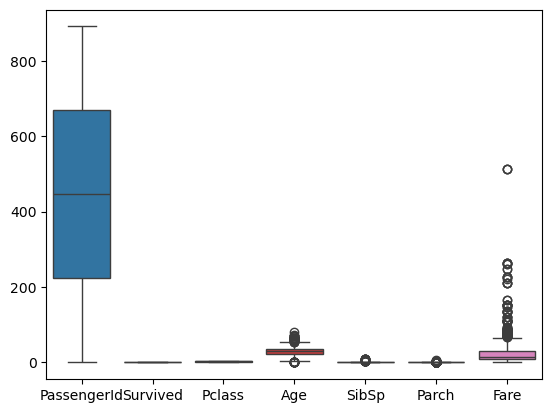

In [29]:
sns.boxplot(data=d_train)

<Axes: >

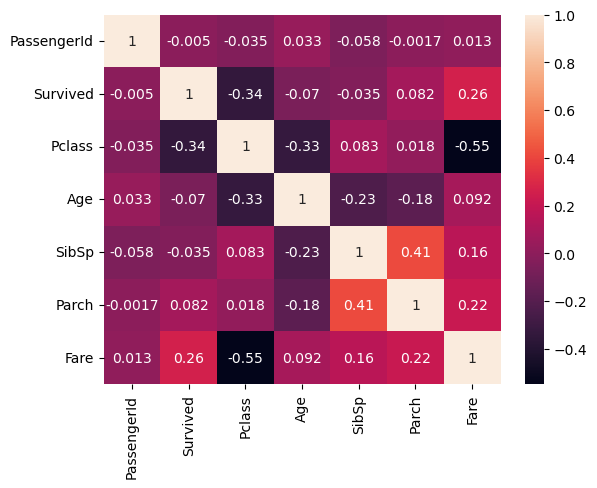

In [30]:
sns.heatmap(z,annot=True)

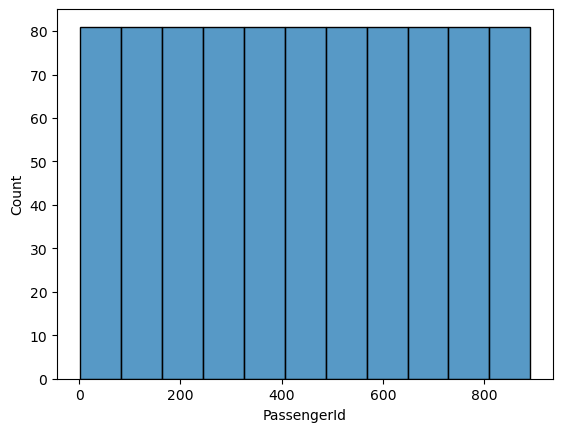

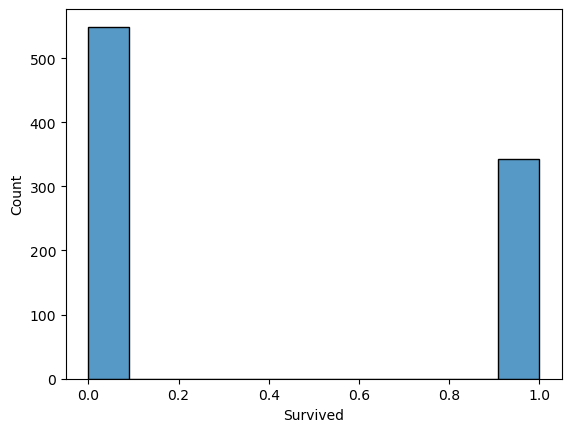

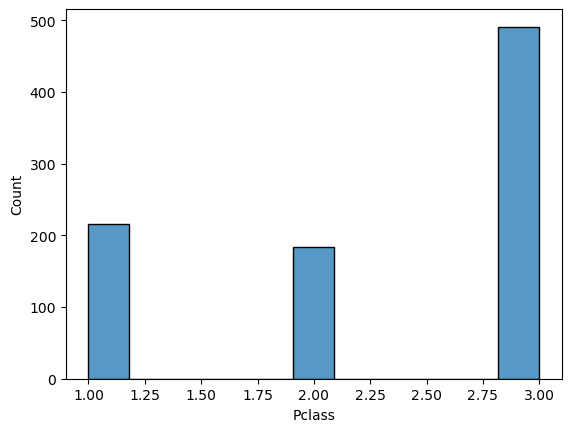

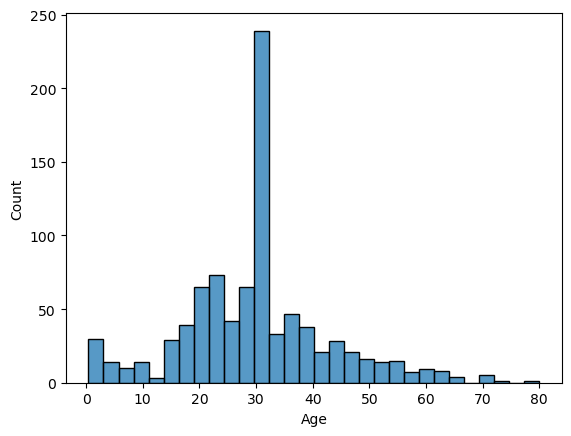

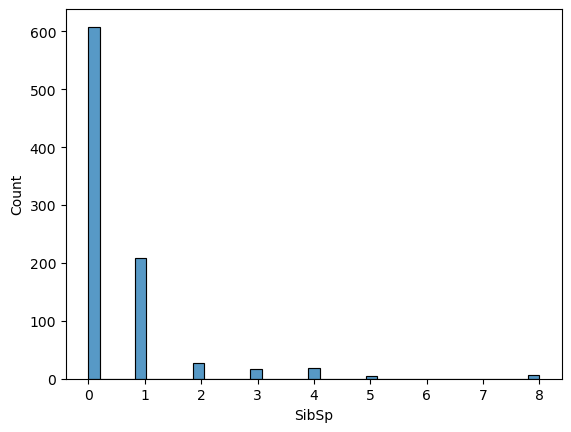

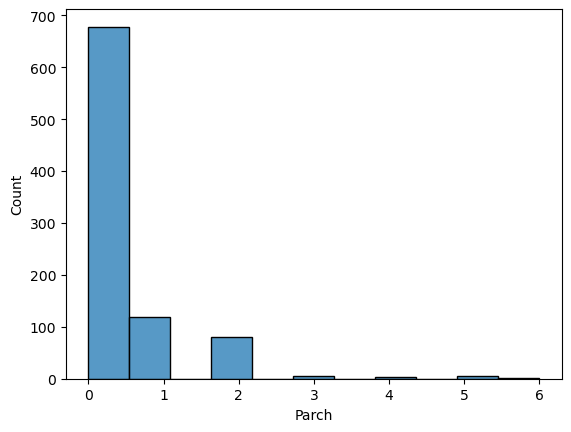

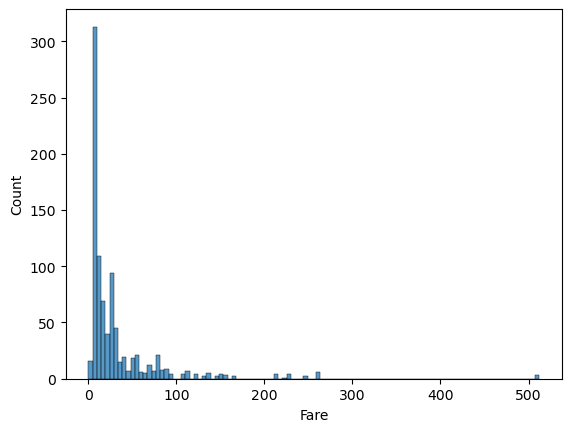

In [31]:
for col in numeric_col:
  sns.histplot(d_train[col],kde=False)
  plt.show()

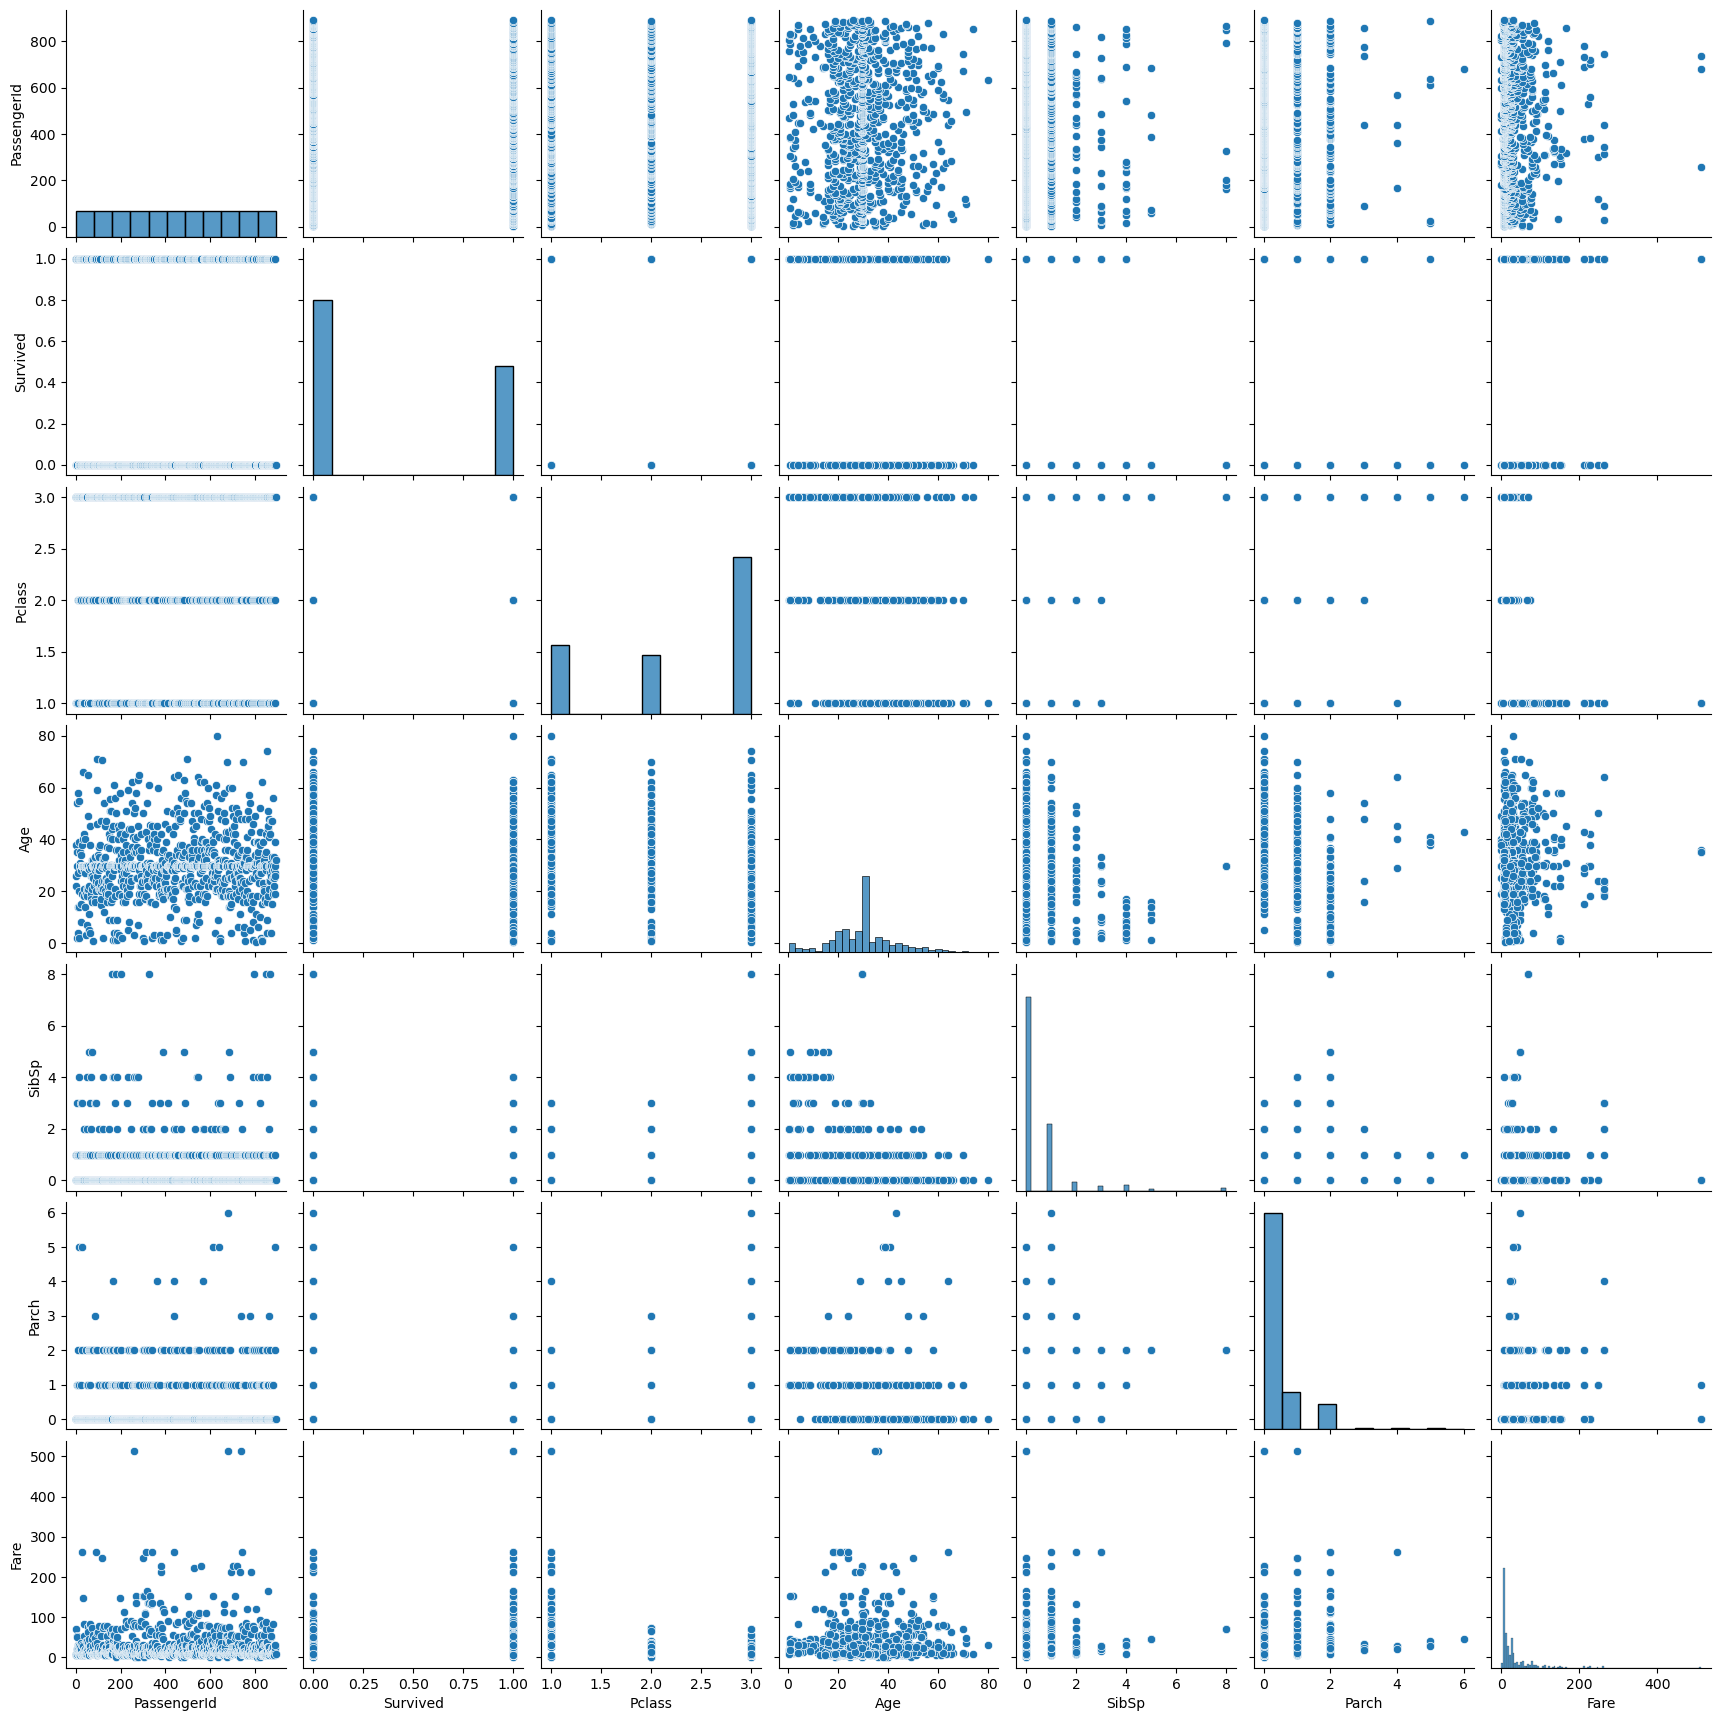

In [32]:
sns.pairplot(data=d_train)

In [33]:
x = d_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [34]:
y=d_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
# Identify categorical columns
cat_cols=x.select_dtypes(include=['object','category']).columns
# One-hot encode with drop_first=True to avoid perfect multicollinearity
x = pd.get_dummies(x, drop_first=True)


In [36]:
import statsmodels.api as sm
# Add constant
X = sm.add_constant(x)

# Drop constant or duplicate columns if any
X = X.loc[:, (X != X.iloc[0]).any()]
X = X.T.drop_duplicates().T

# Convert all to float
X = X.astype(float)

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.000000,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,0.0,0.0,1.0
4,3.0,35.000000,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,1.0,0.0,1.0
887,1.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0
888,3.0,29.699118,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0


In [38]:
# d_train=d_train.drop('Name',axis=1)
# d_train=d_train.drop(['Ticket','Cabin'],axis=1)

In [39]:
#3. Model Bui;ding
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [41]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)


C:\Users\rohit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
ypred1=LR.predict(x_test)
ypred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred1)

0.7988826815642458

In [44]:
#80% classify properly
# 20% Error

In [45]:
#4. Model Evaluation:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred1))

[[89 16]
 [20 54]]


In [46]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [47]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc=roc_auc_score(y_test,ypred1)
print(roc_auc)

0.7886743886743887


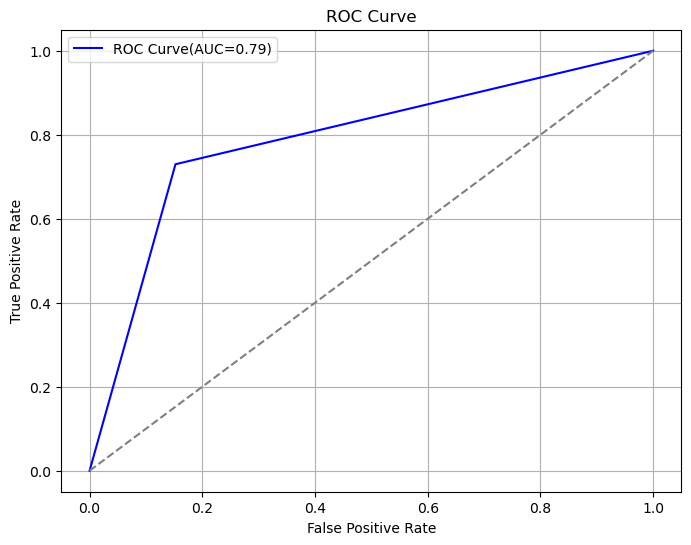

In [48]:
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test, ypred1)
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,color='blue',label=f'ROC Curve(AUC={roc_auc:.2f})')
plt.plot([0, 1],[0, 1],color='gray',linestyle='--')  # random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [49]:
print(d_train.columns)
print(X.dtypes)
print(y.dtypes)
# Convert all columns to float (ensures no object/bool types remain)
x= x.astype(float)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_male      float64
Embarked_Q    float64
Embarked_S    float64
dtype: object
int64


In [50]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Add constant term for intercept
X = sm.add_constant(x)
y= d_train['Survived']
X = X.loc[:, (X != X.iloc[0]).any()]
X = X.T.drop_duplicates().T
# Scale features to prevent numeric overflow
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit(method='lbfgs', maxiter=100)
# Summary of the model
print(result.summary())
# Extract coefficients
coefficients = result.params
odds_ratios = np.exp(coefficients)
# Combine and display
summary_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'P-Value': result.pvalues
})

print("\n=== Feature Interpretation ===\n")
print(summary_df)

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                  0.2557
Time:                        18:35:30   Log-Likelihood:                -441.62
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.123e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0324      0.086      0.377      0.707      -0.136       0.201
Age            0.0042      0.006      0.733      0.463      -0.007       0.016
SibSp         -0.2933      0.095     -3.093      0.0

In [51]:
# the significance of features in predicting survival in your Titanic logistic regression model, we rely on three main things from the regression output:
#Coefficient sign (positive or negative effect on survival)
#P-value (statistical significance)
#Odds ratio (practical interpretation of effect size)

#example:
# In context of Fare
#Coefficient: +0.15,Odds Ratio: ~1.16,P-value: 0.04
#Interpretation: Higher fare paid increases survival probability — likely a proxy for higher class or cabin location.

In [56]:
# saving the model
import pickle
# Save the trained model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(LR, f)

# Save the feature columns used in training
with open("columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

In [57]:
print("Final columns used in model training:")
print(X.columns.tolist())


Final columns used in model training:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [58]:
%%writefile app.py

from flask import Flask, request, jsonify,render_template
import pickle
import pandas as pd

app = Flask(__name__, template_folder='templates')

# Load the trained model and columns
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("columns.pkl", "rb") as f:
    model_columns = pickle.load(f)

# Prediction function
def predict_survival(data):
    # Create DataFrame from incoming JSON
    input_data = pd.DataFrame([data])

    # Fill missing categorical values
    input_data['Embarked'] = input_data['Embarked'].fillna('UNKNOWN')
    input_data['Sex'] = input_data['Sex'].fillna('UNKNOWN')

    # One-hot encode
    input_data_encoded = pd.get_dummies(input_data, drop_first=True)

    # Add missing columns
    for col in model_columns:
        if col not in input_data_encoded.columns:
            input_data_encoded[col] = 0

    # Reorder columns
    input_data_encoded = input_data_encoded[model_columns]

    # Predict
    prediction = model.predict(input_data_encoded)[0]
    result = "Survived " if prediction == 1 else "Did Not Survive 💀"
    return result

@app.route("/", methods=["GET"])
def index():
    return render_template("index.html")

# Health check endpoint
@app.route("/", methods=["GET"])
def home():
    return jsonify({"message": "Titanic Survival API is running!"})

# Prediction endpoint
@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()
        prediction = predict_survival(data)
        return jsonify({"prediction": prediction})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

# Run app
if __name__ == '__main__':
    app.run(debug=True)


Overwriting app.py


In [ ]:
#Interview questions
#1. What is the difference between Precision and Recall?
#Precicion:	Out of all predicted positives, how many were actually positive
#Useful when false positives are costly (e.g., spam filters)
#it measures the exactness of the model
#Precision = TP / (TP + FP)

#Recall:Out of all actual positives, how many did we correctly predict
#Useful when false negatives are costly (e.g., cancer detection)
#it measures the completeness of the model
#Recall = TP / (TP + FN)

In [ ]:
#2. What is Cross-Validation and Why is it Important?
#It is a technique for evaluating the performance of a machine learning model by splitting the dataset into multiple subsets (folds) and training/testing the model on different combinations.
# Importance
# Helps in getting reliable estimates of performance (accuracy, precision, recall, F1-score)
# Reduces overfitting (by validating on unseen data)
# Ensures model works consistently, not just on a lucky train/test split